The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.
Interconnect's services

Interconnect mainly provides two types of services:

    Landline communication. The telephone can be connected to several lines simultaneously.
    Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some other services the company provides include:

    Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
    A dedicated technical support line (TechSupport)
    Cloud file storage and data backup (OnlineBackup)
    TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [3]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [8]:
#checking duplicate
print("Number of Duplicates:\n",
"Contract", contract.duplicated().sum(), "\n",
"Personal", personal.duplicated().sum(), "\n",
"Internet", internet.duplicated().sum(), "\n",
"Phone", phone.duplicated().sum())

Number of Duplicates:
 Contract 0 
 Personal 0 
 Internet 0 
 Phone 0


No duplicates in the dataset.

Next, we should check missing values and the format.

Additionally, we will check some of the column values in each of the data frames to see how they might be encoded.

In [9]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
#checking how many different classificatons

print("Contract:", contract['Type'].unique())
print("Payment Method:", contract['PaymentMethod'].unique())

Contract: ['Month-to-month' 'One year' 'Two year']
Payment Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
personal['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [14]:
internet['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [15]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In this step, there are a few observations to keep in mind. Notably, the internet and phone dataframes are smaller compared to the contract and personal dataframes, which is expected since some users might only have one type of plan.

For preprocessing, we should consider the following adjustments:

    Contract Dataframe:
        Convert BeginDate and EndDate from object to datetime format.
        Change PaperlessBilling to a boolean integer.
        Convert TotalCharges from an object to a float.

    Personal Dataframe:
        Convert Gender, Partner, and Dependents from objects to boolean integers.

    Internet Dataframe:
        All columns except customerID and InternetService could be converted to booleans.

    Phone Dataframe:
        Convert MultipleLines to a boolean.

Overall, our preprocessing will mainly involve changing data types. Encoding may not be necessary, but it can be applied to all columns if needed.


# Data Preparation

We should fix the data.

In [16]:
contract['BeginDate'] = contract['BeginDate'].astype('datetime64[ns]')

In [17]:
contract[contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


We can confirm this issue exists. It appears that accounts with a begin date of February 1, 2020, have an error where their `TotalCharges` field is blank. This makes sense since these are the most recent customers in the dataset and haven't made any payments yet. Therefore, we should set their `TotalCharges` to 0.

However, before doing so, we need to verify that all the affected entries are indeed from February 1.

In [18]:
contract[contract['BeginDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [19]:
#convert column to numerica and fill
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors = 'coerce').fillna(0)

Next, we need to address the `EndDate` column. This is more complex because `EndDate` is marked as "No" if the plan is active, and contains a date if the plan was canceled. To handle this, we'll create two separate columns: one to indicate if the plan was canceled, and another to record the cancellation date.

We'll also add a new feature called `LastDate` to represent the most recent known service date. For customers who haven't canceled, we'll assign a date of March 1, 2020. Although the exact date varies by plan, this will provide a more consistent metric, as any service still active as of February 1 will continue until at least March.

In [20]:
end_dates = []
for value in contract.EndDate:
    if value != 'No':
        date_and_time = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        end_dates.append(date_and_time)
    else:
        end_dates.append(datetime(2020, 3, 1, 0, 0, 0))

In [21]:
# add LastDate

contract.insert(3, 'LastDate', pd.to_datetime(end_dates))

In [22]:
# add CustomerDuration

contract.insert(4, 'CustomerDuration', (contract['LastDate'] - contract['BeginDate'])/np.timedelta64(1, 'M'))

contract.head()

,customerID,BeginDate,EndDate,LastDate,CustomerDuration,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65


In [23]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   CustomerDuration  7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 550.4+ KB


In [24]:
#add column showing if contract has been ended
contract['ServiceEnded'] = (contract['EndDate'] != 'No').astype('int')

In [25]:
contract.head()

,customerID,BeginDate,EndDate,LastDate,CustomerDuration,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceEnded
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
data = (contract.merge(
        personal, how = 'left', on = 'customerID').merge(
        internet, how = 'left', on = 'customerID').merge(
        phone, how = 'left', on = 'customerID'))

In [27]:
data.head()

,customerID,BeginDate,EndDate,LastDate,CustomerDuration,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,...,No,No,Fiber optic,No,No,No,No,No,No,No


# Preparing Full Data Set

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   CustomerDuration  7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  ServiceEnded      7043 non-null   int64         
 11  gender            7043 non-null   object        
 12  SeniorCitizen     7043 non-null   int64         
 13  Partner           7043 non-null   object        
 14  Dependents        7043 n

It's clear that the following columns contain null values: `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `MultipleLine`. This makes sense since they come from our smaller datasets. Fortunately, these columns are currently represented as objects and mostly contain "Yes" or "No" values.

We should fill all these columns with "No" for missing values. For the `InternetService` column, we could also use "None," but to keep things simple, we'll use "No" across all columns.

In [29]:
no_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in no_columns:
    data[col] = data[col].fillna('No')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   CustomerDuration  7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   object        
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  ServiceEnded      7043 non-null   int64         
 11  gender            7043 non-null   object        
 12  SeniorCitizen     7043 non-null   int64         
 13  Partner           7043 non-null   object        
 14  Dependents        7043 n

In [31]:
data['NetServices'] = [7-x.count('No') for x in zip(data['InternetService'],
                                                    data['OnlineSecurity'],
                                                    data['OnlineBackup'],
                                                    data['DeviceProtection'],
                                                    data['TechSupport'], 
                                                    data['StreamingTV'], 
                                                    data['StreamingMovies'])]



In [32]:
data.head()

,customerID,BeginDate,EndDate,LastDate,CustomerDuration,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,NetServices
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,Yes,Electronic check,29.85,29.85,...,No,DSL,No,Yes,No,No,No,No,No,2
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,No,Mailed check,56.95,1889.50,...,No,DSL,Yes,No,Yes,No,No,No,No,3
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,Yes,Mailed check,53.85,108.15,...,No,DSL,Yes,Yes,No,No,No,No,No,3
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,No,Bank transfer (automatic),42.30,1840.75,...,No,DSL,Yes,No,Yes,Yes,No,No,No,4
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,Yes,Electronic check,70.70,151.65,...,No,Fiber optic,No,No,No,No,No,No,No,1


Before performing EDA, we can improve the results by encoding our boolean columns now.

We'll convert 11 columns to booleans. For 10 of them—`PaperlessBilling`, `Partner`, `Dependents`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `MultipleLines`—we'll map "Yes" to True and "No" to False. For `Gender`, we'll map "Male" and "Female" to booleans.

While we might eventually want to encode the `Type`, `PaymentMethod`, and `InternetService` columns, it may be more useful to keep them as categorical variables for EDA.

In [33]:
#set boolean columns

bool_cols = ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

#convert to boolean

for columns in bool_cols:
    data[columns] = data[columns].map({'Yes' : 1, 'No' : 0})
    
#convert gender to boolean
data['gender'] = data['gender'].map({'Male' : 1, 'Female' : 0})

In [34]:
#one final check to ensure everything looks fine
data.head()

,customerID,BeginDate,EndDate,LastDate,CustomerDuration,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,NetServices
0,7590-VHVEG,2020-01-01,No,2020-03-01,1.971293,Month-to-month,1,Electronic check,29.85,29.85,...,0,DSL,0,1,0,0,0,0,0,2
1,5575-GNVDE,2017-04-01,No,2020-03-01,34.990452,One year,0,Mailed check,56.95,1889.50,...,0,DSL,1,0,1,0,0,0,0,3
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01,2.004148,Month-to-month,1,Mailed check,53.85,108.15,...,0,DSL,1,1,0,0,0,0,0,3
3,7795-CFOCW,2016-05-01,No,2020-03-01,45.996838,One year,0,Bank transfer (automatic),42.30,1840.75,...,0,DSL,1,0,1,1,0,0,0,4
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01,2.004148,Month-to-month,1,Electronic check,70.70,151.65,...,0,Fiber optic,0,0,0,0,0,0,0,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   LastDate          7043 non-null   datetime64[ns]
 4   CustomerDuration  7043 non-null   float64       
 5   Type              7043 non-null   object        
 6   PaperlessBilling  7043 non-null   int64         
 7   PaymentMethod     7043 non-null   object        
 8   MonthlyCharges    7043 non-null   float64       
 9   TotalCharges      7043 non-null   float64       
 10  ServiceEnded      7043 non-null   int64         
 11  gender            7043 non-null   int64         
 12  SeniorCitizen     7043 non-null   int64         
 13  Partner           7043 non-null   int64         
 14  Dependents        7043 n

# Exploratory Data Analysis

In [36]:
data[['MonthlyCharges', 'TotalCharges', 'ServiceEnded', 'CustomerDuration', 'NetServices']].describe()

,MonthlyCharges,TotalCharges,ServiceEnded,CustomerDuration,NetServices
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.265370,33.094739,2.821241
std,30.090047,2266.794470,0.441561,24.713423,2.113505
min,18.250000,0.000000,0.000000,0.952792,0.000000
25%,35.500000,398.550000,0.000000,9.002238,1.000000
50%,70.350000,1394.550000,0.000000,29.963654,3.000000
75%,89.850000,3786.600000,1.000000,56.017577,4.000000
max,118.750000,8684.800000,1.000000,72.937843,7.000000


It seems that both `MonthlyCharges` and `TotalCharges` are quite inconsistent, which is expected given that they depend on both the plan type and the duration of service. While high variation in `TotalCharges` is anticipated, most values should cluster on the lower end, with some outliers driving up the mean since the highest totals require long-term service.

The majority of customers have a `CustomerDuration` of around 30 months (about 2.5 years). However, the high standard deviation suggests that 68% of customers have durations between 5 and 57 months (roughly 0.5 to 4.75 years). A histogram can give us a clearer picture of this distribution.

Most customers have not canceled their services, as shown by the median and mean being both at 0.

On average, each customer uses around 3 internet services, with a mean of 3 and a median of 2.82.

## Histograms

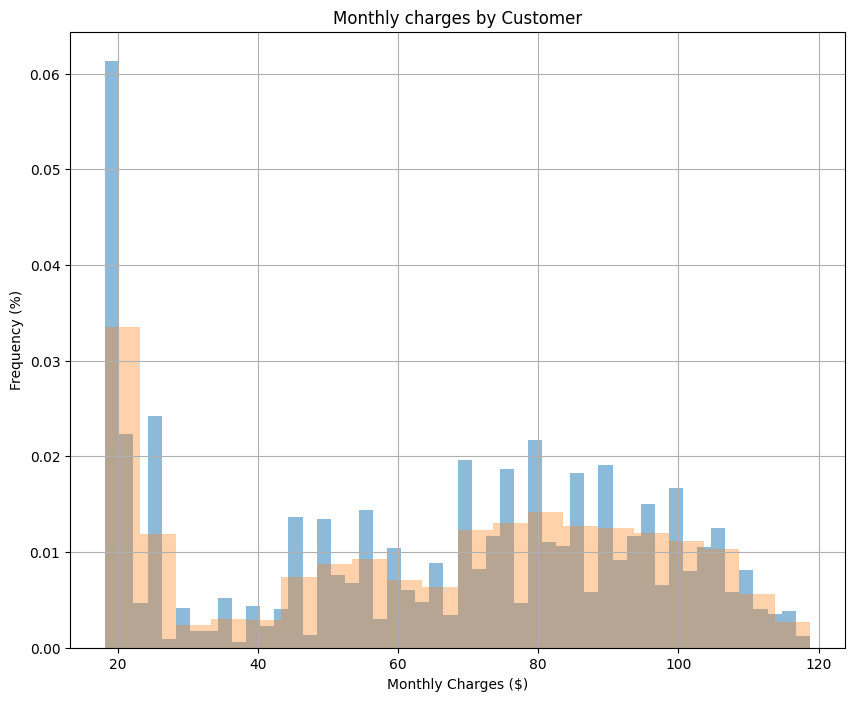

In [38]:
fig = plt.figure(figsize = (10,8))

data['MonthlyCharges'].plot(kind = 'hist', bins = 50, density = True, alpha = 0.5)
data['MonthlyCharges'].plot(kind = 'hist', bins = 20, 
                            density = True, alpha = 0.35, grid = True)

plt.title('Monthly charges by Customer')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency (%)');

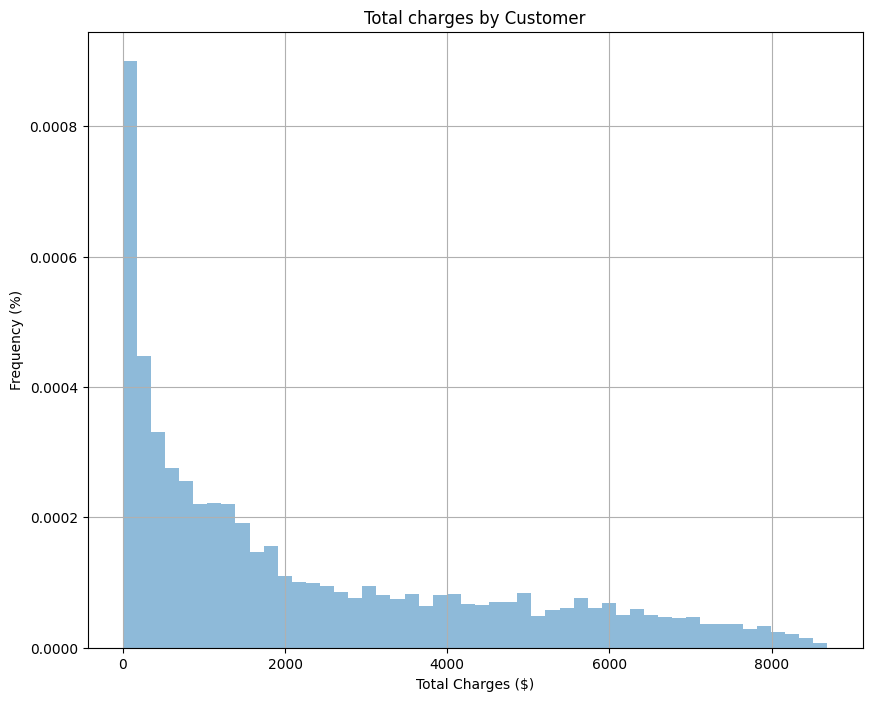

In [39]:
data['TotalCharges'].plot(kind = 'hist', bins = 50,
                          density = True, alpha = 0.5, grid = True, figsize = (10,8))
plt.title('Total charges by Customer')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency (%)');


As expected, the monthly charges are quite varied. However, there is a discernible pattern with fewer bins indicating that most users opt for lower-cost plans. Among those who pay more, there seems to be an approximate normal distribution centered around an average monthly fee of about 80 dollars.

It’s possible to identify three groups: one focused on minimizing costs, another averaging around $50, and a third averaging about $80. The dip around 60 dollars may appear random or could indicate a trend. Regardless, the presence of distinct groups with varying averages aligns with our descriptive statistics.

The histogram for total charges presents a clearer picture. Most observations fall at lower total charges, with a decline in frequency. This is expected and not concerning; it simply reflects that most users are not long-term subscribers. For example, a user paying 80 dollars monthly would need just over 4 years to reach a total charge of 4000 dollars.

From the total charges histogram, we can infer that as the frequency decline slows beyond a certain point, users who have been with the service for a while are less likely to cancel or change their plans. This could explain why a similar proportion of users has total charges of 2000 dollars, 4000 dollars, and 6000 dollars.

Lastly, we will create a histogram for customer duration. With a maximum duration of 72 months, we can set 12 bins to segment our data into approximate 6-month intervals.

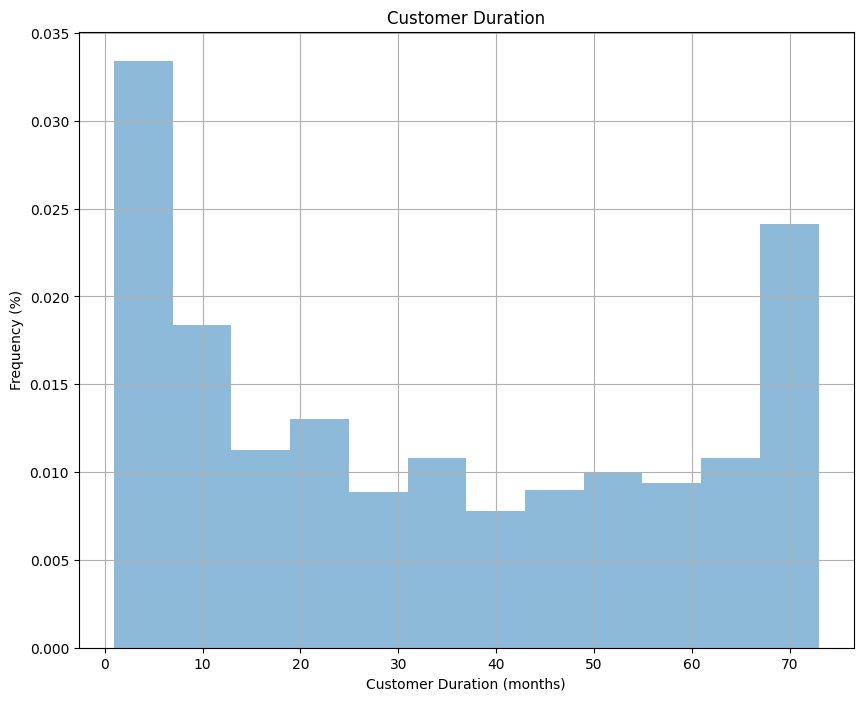

In [40]:
fig = plt.figure(figsize = (10,8))

data['CustomerDuration'].plot(kind = 'hist', bins = 12,
                            density = True, alpha = 0.5, grid = True)
plt.title('Customer Duration')
plt.xlabel('Customer Duration (months)')
plt.ylabel('Frequency (%)');

We see here that most of our customers are leaving within the first 6 months of service and from that point forward they seem to remain fairly consistent. Likely we can conclude that if we hold a customer for at least six months to one year, they will retain services with us.

## Box Plot

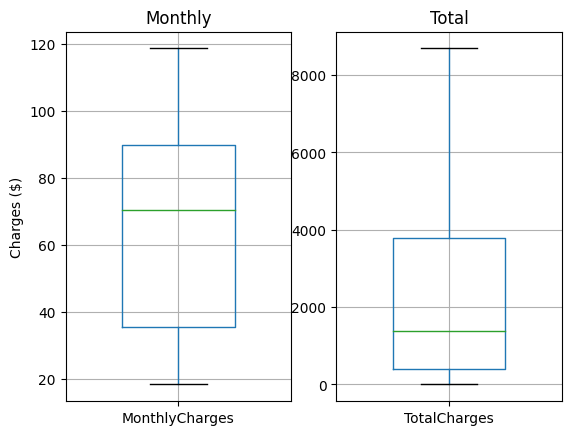

In [41]:
plt.subplot(1, 2, 1)
data.boxplot(column = 'MonthlyCharges', figsize = (5, 5), widths = 0.5)
plt.title('Monthly')
plt.ylabel('Charges ($)')

plt.subplot(1, 2, 2)
data.boxplot(column = 'TotalCharges', figsize = (5, 5), widths = 0.5)
plt.title('Total');

These box plots serve as visual representations of our descriptive statistics and don't reveal anything new that we haven't observed so far. The primary purpose of creating box plots for these specific numbers is to identify any outliers.

Since we do not observe any outliers, this is helpful information. Next, we can gain valuable insights by creating additional box plots based on grouped data. The most informative groupings will be by payment plan and by the number of internet services used.

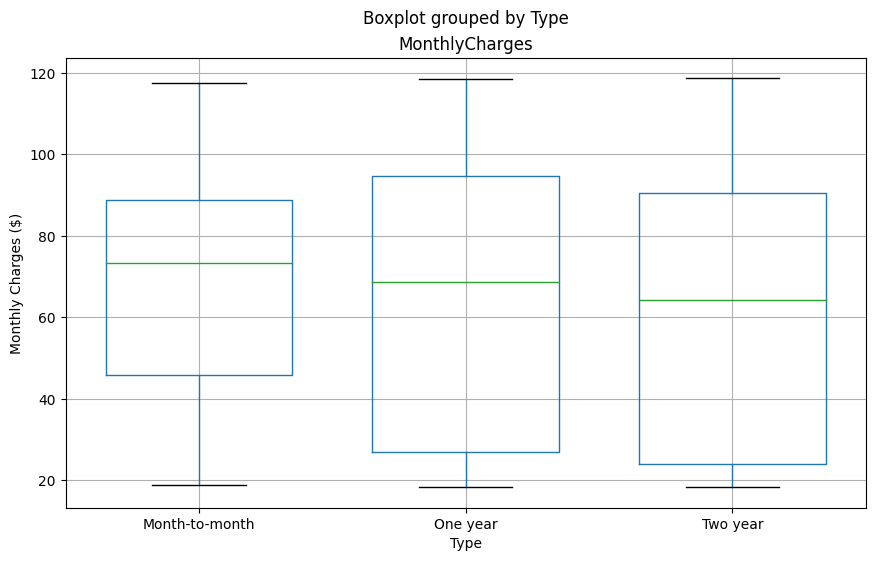

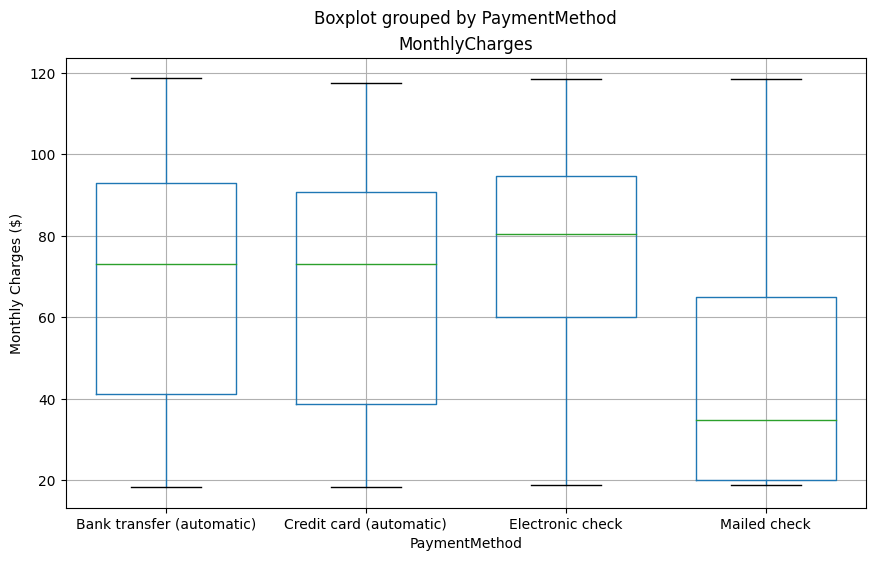

In [43]:
data.boxplot(column = 'MonthlyCharges', by = 'Type', figsize = (10,6), widths = 0.7)
plt.ylabel('Monthly Charges ($)')

data.boxplot(column = 'MonthlyCharges', by = 'PaymentMethod', figsize = (10,6), widths = 0.7)
plt.ylabel('Monthly Charges ($)');

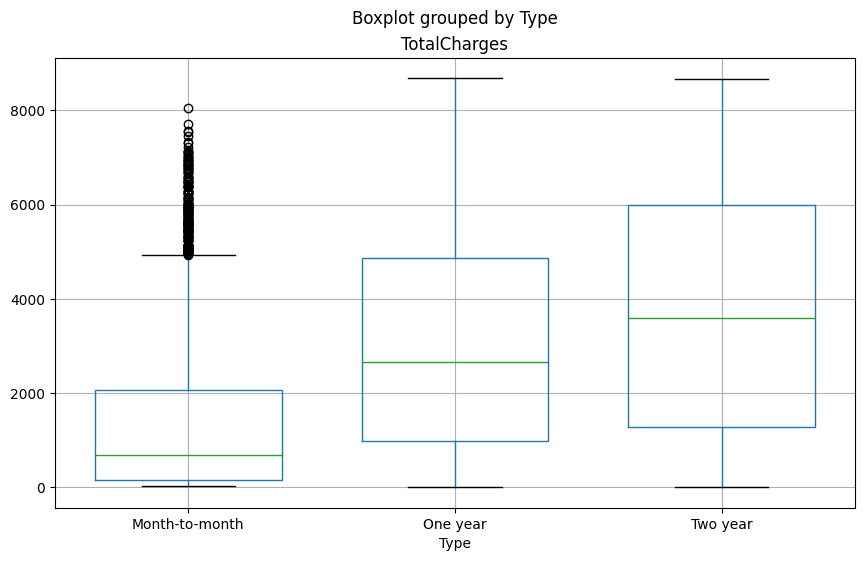

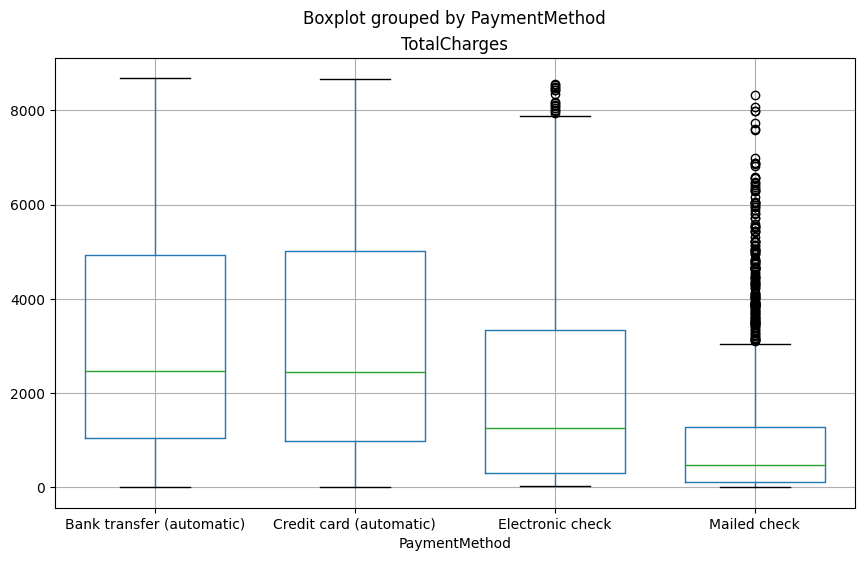

In [44]:
data.boxplot(column = 'TotalCharges', by = 'Type', figsize = (10,6), widths = 0.7)
data.boxplot(column = 'TotalCharges', by = 'PaymentMethod', figsize = (10,6), widths = 0.7);

For monthly charges, the amounts are quite similar across different plans. Month-to-month plans exhibit more condensed values, but overall, their means, minimums, and maximums are comparable. This is likely due to the limited number of plan options, indicating that users’ service choices are not influenced by their payment plans.

However, total charges tell a different story, particularly for month-to-month payments, which show significantly lower overall payments along with many outliers. This suggests that many customers who opt for month-to-month contracts tend to cancel quickly, while others continue using the service without switching payment methods.

A similar trend is observed in the box plots grouped by payment method, where checks (especially mailed checks) display patterns akin to those seen with month-to-month payments.

Lastly, we can create box plots grouped by the number of internet services used.

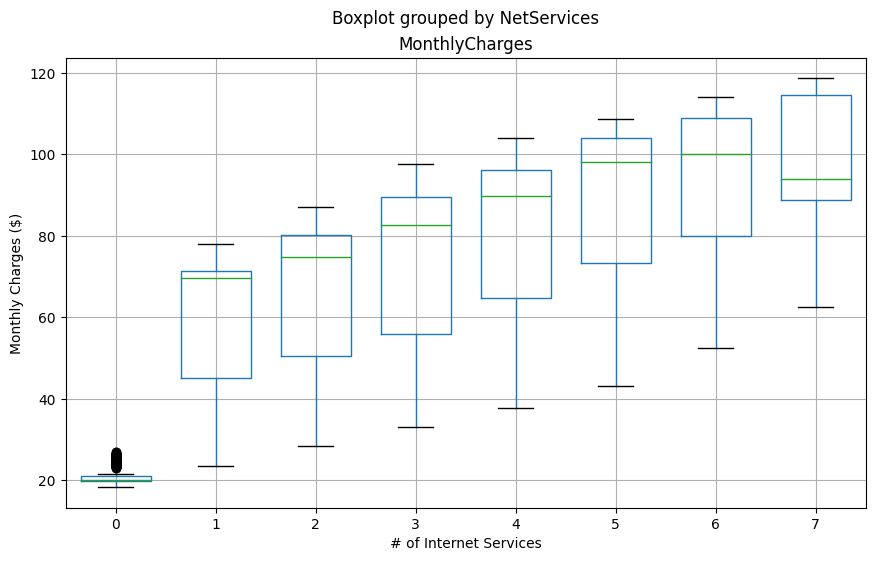

In [45]:
data.boxplot(column = 'MonthlyCharges', by = 'NetServices', figsize = (10,6), widths = 0.7)
plt.xlabel('# of Internet Services')
plt.ylabel('Monthly Charges ($)');

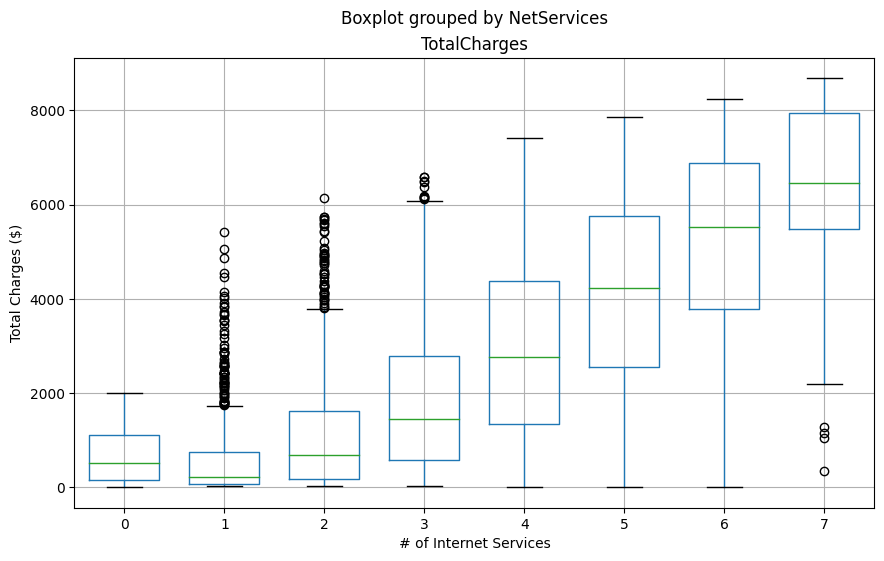

In [46]:
data.boxplot(column = 'TotalCharges', by = 'NetServices', figsize = (10,6), widths = 0.7)
plt.xlabel('# of Internet Services')
plt.ylabel('Total Charges ($)');

Our box plots show that for both monthly and total charges there is a steady increase in the fees. This is one of the strongest connections we can see in the box plots so this is definitely a feature to keep in mind when building our models. On the subject of features, though, we can directly examine our pairs.

## Correlation Matrix

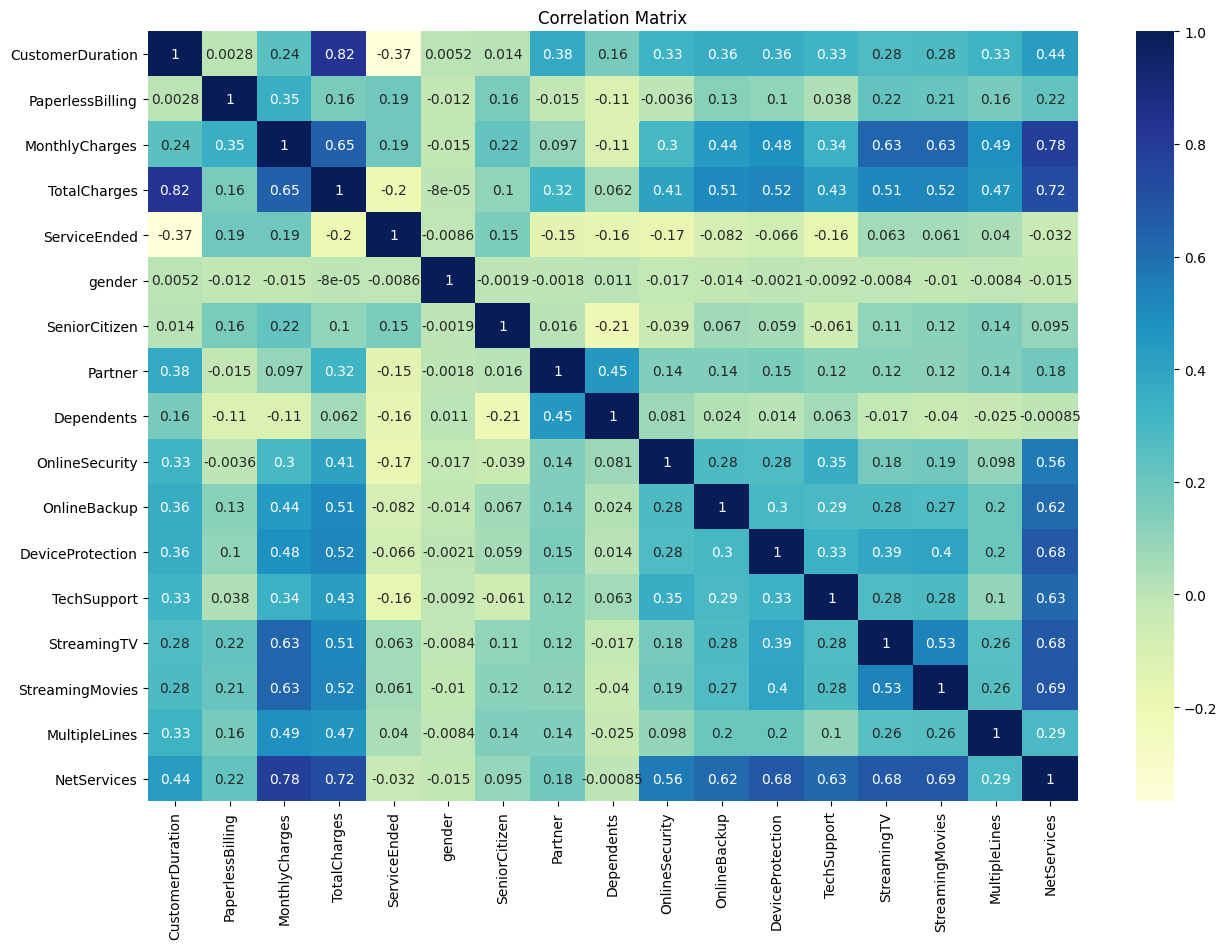

In [47]:
plt.figure(figsize = (15,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')
plt.show()

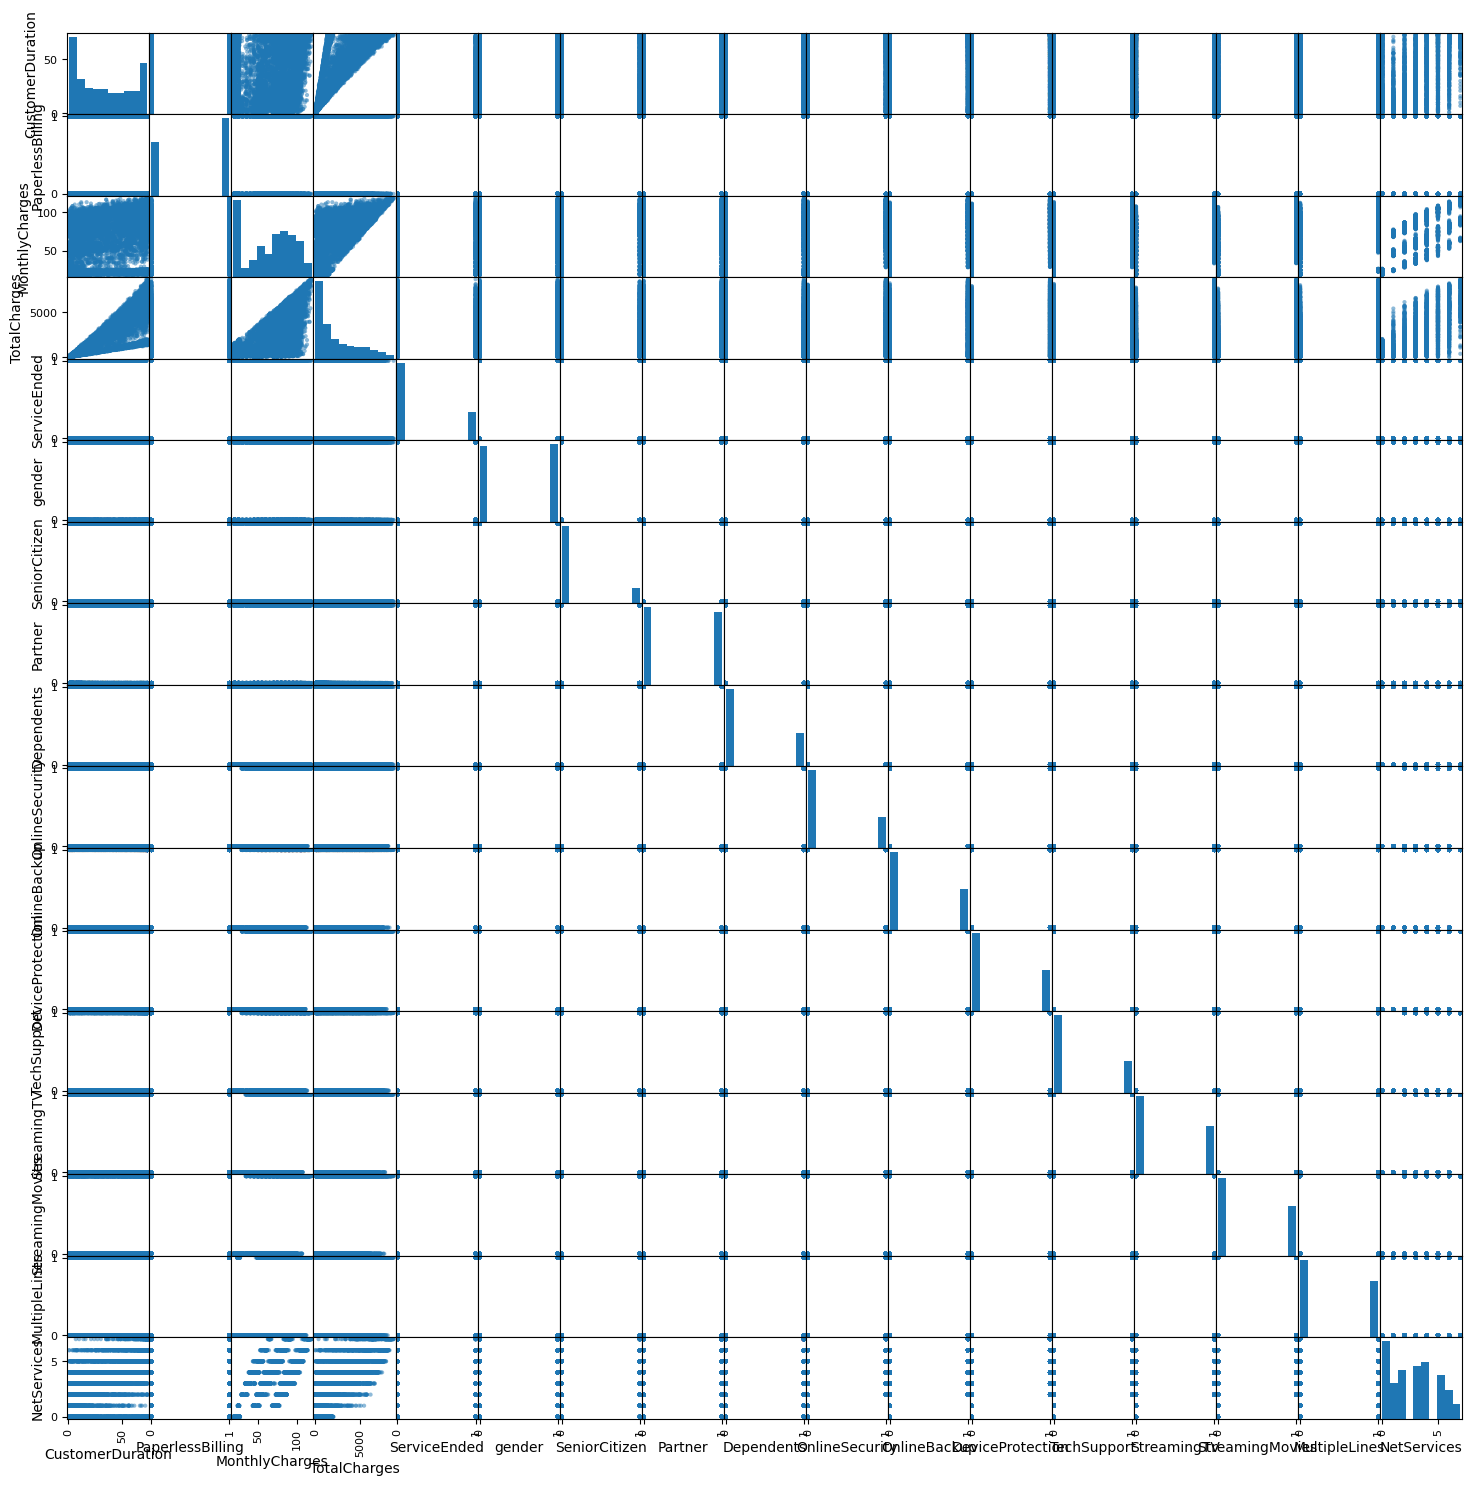

In [48]:
pd.plotting.scatter_matrix(data, figsize=(18,18))
plt.show()

There are some weak correlations among our data points, but most are quite evident. For example, there is a moderately strong correlation (approximately 0.4 to 0.6) between specific internet services and monthly/total fees, as well as a strong correlation between being married and having dependents. However, overall, the data does not show strong correlations with other variables.

The strongest correlations influencing our target, ServiceEnded, appear to be related to pricing and the services used. To summarize key insights from the correlation matrix regarding ServiceEnded:

- The most significant positive correlation with service cancellation is the monthly price.
- A similarly strong correlation exists with customers using paperless billing, which is somewhat puzzling. While one might expect online payment options to enhance customer retention, it raises questions about potential website issues or whether customers using paperless billing simply tend to have higher monthly fees—this warrants further investigation.
- There is a moderate correlation between senior citizens and service cancellations, likely reflecting the life stage of older adults.
- A negative correlation between total charges and ServiceEnded suggests that customer retention is generally strong.
- Married individuals and those with dependents show a moderately strong negative correlation, indicating they are less likely to cancel their services.
- Security services exhibit a negative correlation with ServiceEnded, particularly the malicious website blocker, suggesting our security products are effective.
- Tech Support also shows a negative correlation with ServiceEnded, indicating that our technical support is functioning well.
- Conversely, there is a slight positive correlation between streaming services and ServiceEnded, suggesting there may be areas for improvement in that aspect.

# Check Class Imbalance

ServiceEnded value counts:
0    5174
1    1869
Name: ServiceEnded, dtype: int64 

Proportion of data set with ServiceEnded = 1:
 0.2653698707936959 



<AxesSubplot:xlabel='ServiceEnded', ylabel='count'>

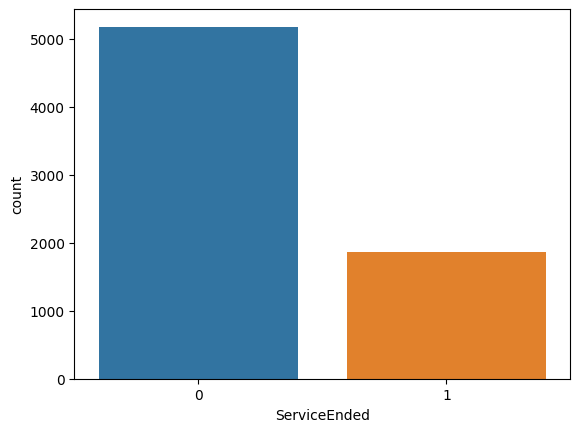

In [49]:
print("ServiceEnded value counts:")
print(data['ServiceEnded'].value_counts(), "\n")
print("Proportion of data set with ServiceEnded = 1:\n",len(data[data['ServiceEnded'] == 1]) / len(data), "\n")
sns.countplot(data['ServiceEnded'])

Roughly 26.5369% of the data is in ServiceEnded = 1. This is probably not horribly balanced but it is not well-balanced. Because the purpose of the model will be to retain customers by determining when one is likely to cancel their plans, accounting for this imbalance after we create our training dataset is probably the better option. It might result in a model more biased towards false positives, but for our intended model, having a false positive is preferable to potentially losing a customer.

# Train the Model

The project will utilize a supervised learning model. Before training, we need to perform a features/target split, with 'EndDate' as our target column. Additionally, we will split the data for testing purposes using a 60/20/20 ratio: 60% for the training set, 20% for validation, and 20% for testing.

Our goal is to achieve an AUC-ROC of at least 0.75, which is the minimum acceptable threshold. We should aim for a higher value but do not expect to exceed 0.88 significantly. To estimate the time required for hyperparameter tuning, we will evaluate several models, including:

- Dummy model
- Decision Tree
- Linear Regression
- Random Forest
- CatBoost

We may also consider Light GBM and XGBoost, but since gradient boosting models tend to require longer training times, we will only test them if the other models perform poorly.

To facilitate model evaluation, we should create a simple function to output relevant metrics, including ROC-AUC, accuracy, F1 score, and precision-recall scores, along with their corresponding graphs. Additionally, we will generate a confusion matrix to determine whether our errors are primarily due to false negatives or false positives.

In [50]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    print()
    
    print('Confusion Matrix')
    print(confusion_matrix(target, pred_target))    
    
    # add a flag that will automatically bring up if our ROC-AUC is too low
    
    print()
    
    if roc_auc < 0.75:
        print("Insufficient ROC-AUC.")
    
    return

# Train/Test Split

In [51]:
# create features and target

features = data.drop(['customerID', 'BeginDate', 'EndDate', 'LastDate', 'ServiceEnded'], axis = 1)
target = data['ServiceEnded']

In [53]:
# encode categorical features

encoders = {}
for column_name in ['Type', 'PaymentMethod', 'InternetService']:
    encoders[column_name] = LabelEncoder()
    features[column_name] = encoders[column_name].fit_transform(features[column_name])

In [54]:
# training/validation/test split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.20, 
                                                                              random_state = 12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
    test_size = 0.25, random_state = 12345) 

In [55]:
# print the shape to confirm split has been done properly

print("Shapes of the Data Splits:\n")
print("Training:", features_train.shape, target_train.shape)
print("Validation:", features_valid.shape, target_valid.shape)
print("Test:", features_test.shape, target_test.shape)

Shapes of the Data Splits:

Training: (4225, 19) (4225,)
Validation: (1409, 19) (1409,)
Test: (1409, 19) (1409,)


ServiceEnded value counts:
0    3088
1    1137
Name: ServiceEnded, dtype: int64 



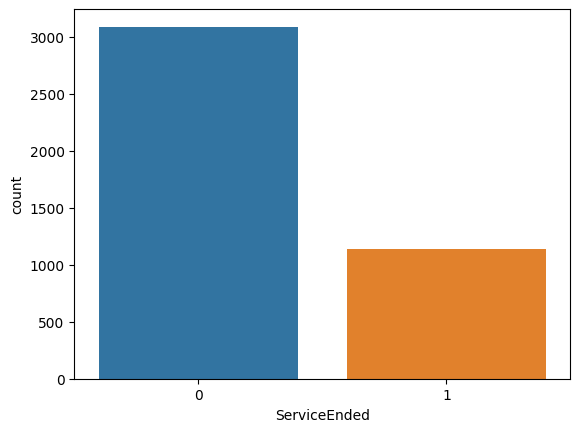

In [56]:
print("ServiceEnded value counts:")
print(target_train.value_counts(), "\n")
sns.countplot(target_train);

In [57]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 2
)

ServiceEnded value counts:
0    3088
1    2274
Name: ServiceEnded, dtype: int64 



<AxesSubplot:xlabel='ServiceEnded', ylabel='count'>

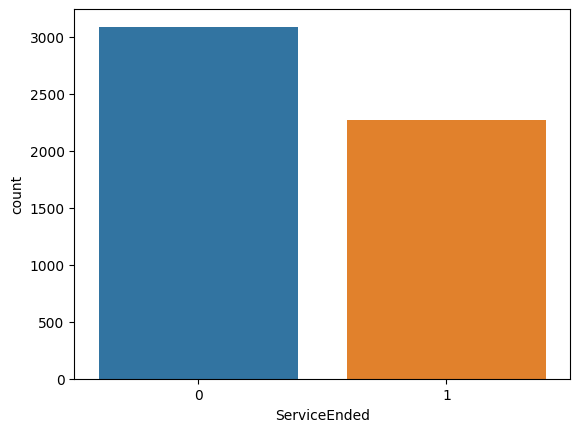

In [58]:
print("ServiceEnded value counts:")
print(target_upsampled.value_counts(), "\n")
sns.countplot(target_upsampled)

We will not use the upsampled data for the moment, but will keep it as an option if our initial models are not promising.

# Dummy Model

First, we will create a dummy model. We should expect accuracy metrics of around 50% at best, but it will be good to benchmark. It also will let us test our evaluate_model function.


In [59]:
# create model

dummy_model = DummyClassifier(strategy = 'uniform')
dummy_model.fit(features_train, target_train)

DummyClassifier(strategy='uniform')

          train  test
Accuracy   0.49  0.51
F1         0.34  0.34
APS        0.27  0.25
ROC AUC    0.50  0.50

Confusion Matrix
[[540 516]
 [177 176]]

Insufficient ROC-AUC.


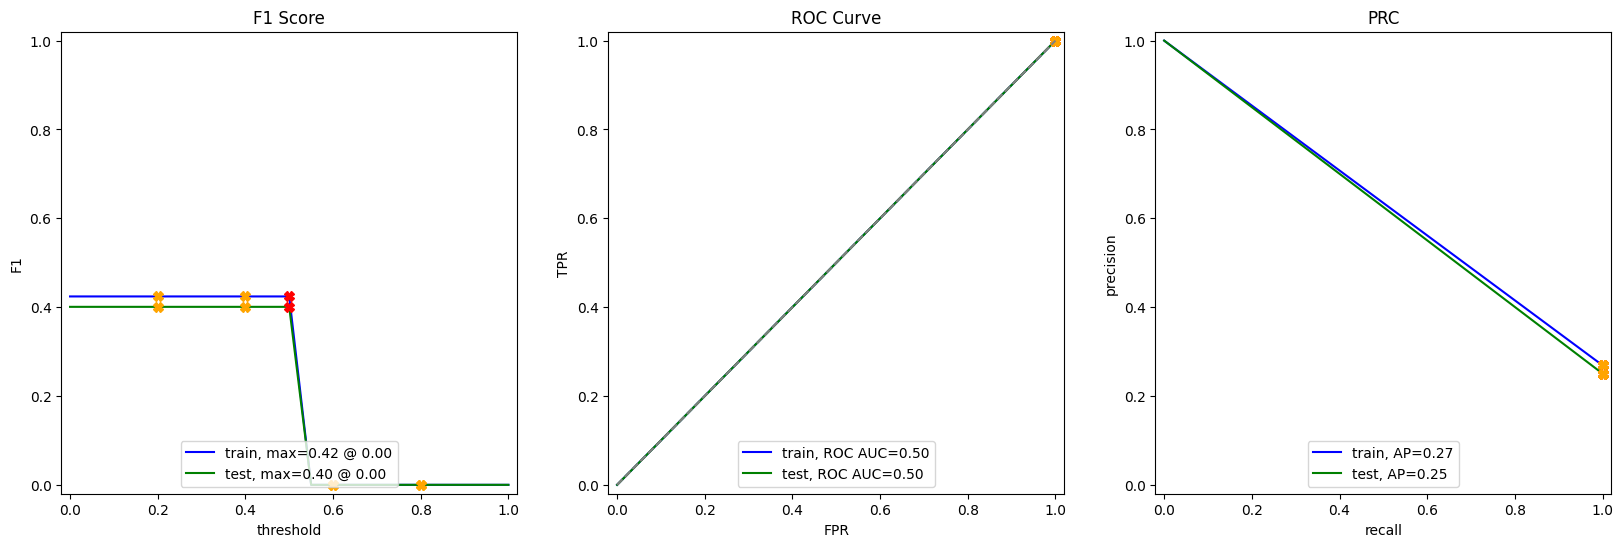

In [60]:
# test model

evaluate_model(dummy_model, features_train, target_train, features_valid, target_valid)

In [61]:
#try basics models
%time

# decision tree

dt = DecisionTreeClassifier(random_state = 12345)
dt.fit(features_train, target_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


DecisionTreeClassifier(random_state=12345)

          train  test
Accuracy    1.0  0.84
F1          1.0  0.69
APS         1.0  0.55
ROC AUC     1.0  0.79

Confusion Matrix
[[940 116]
 [106 247]]



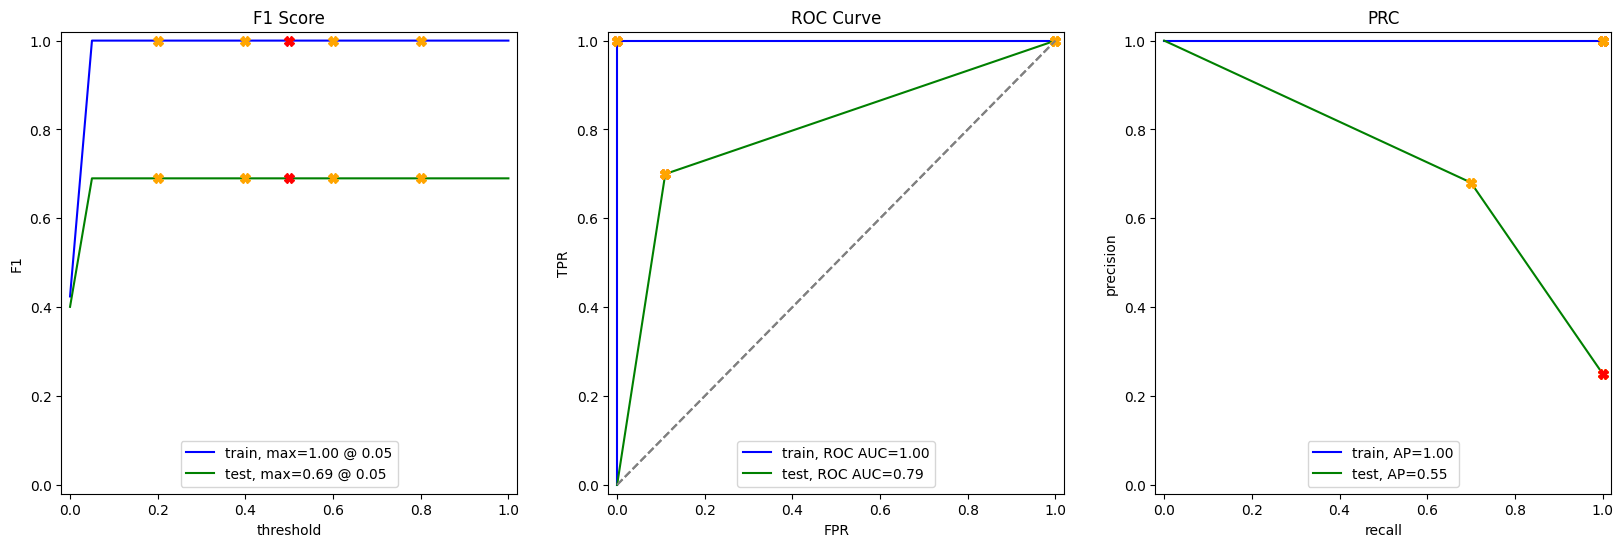

In [62]:
evaluate_model(dt, features_train, target_train, features_valid, target_valid)

In [63]:
%time
# logistic regression

lr = LogisticRegression(random_state = 12345, solver = 'liblinear')
lr.fit(features_train, target_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.81  0.81
F1         0.63  0.60
APS        0.70  0.65
ROC AUC    0.86  0.84

Confusion Matrix
[[935 121]
 [151 202]]



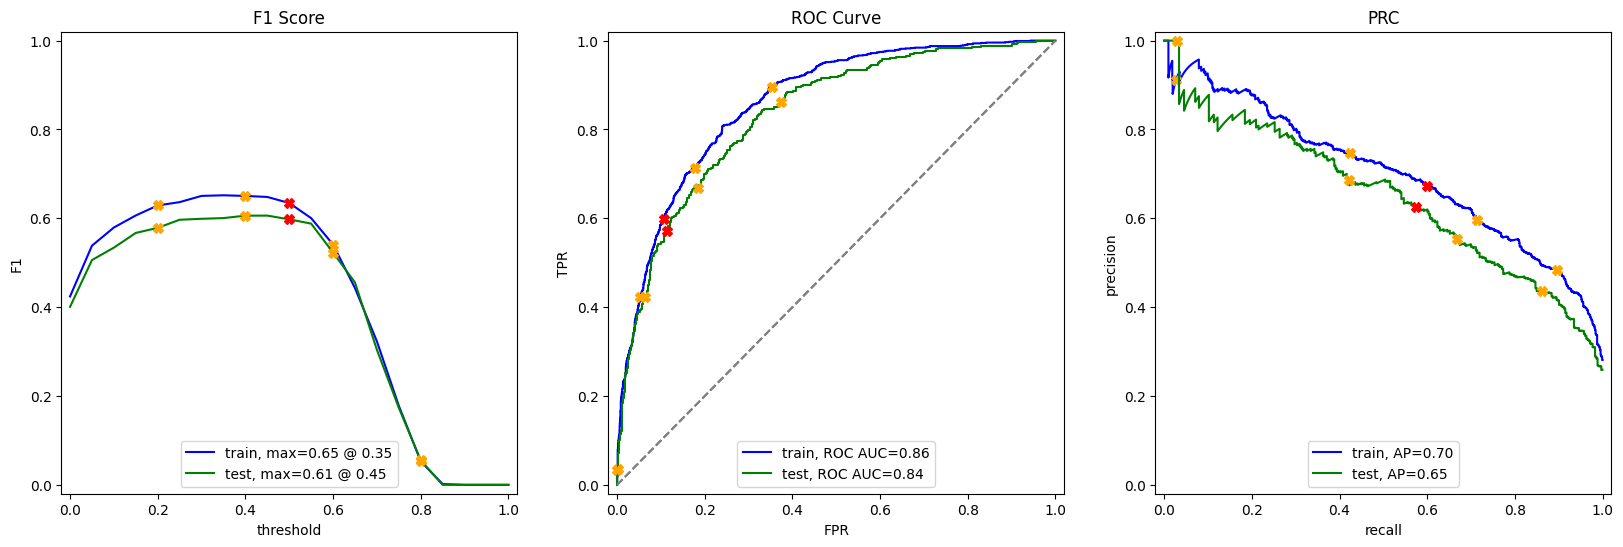

In [64]:
evaluate_model(lr, features_train, target_train, features_valid, target_valid)


In [65]:
%time

# random forest

rf = RandomForestClassifier(random_state = 12345)
rf.fit(features_train, target_train)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


RandomForestClassifier(random_state=12345)

          train  test
Accuracy    1.0  0.83
F1          1.0  0.62
APS         1.0  0.73
ROC AUC     1.0  0.86

Confusion Matrix
[[981  75]
 [160 193]]



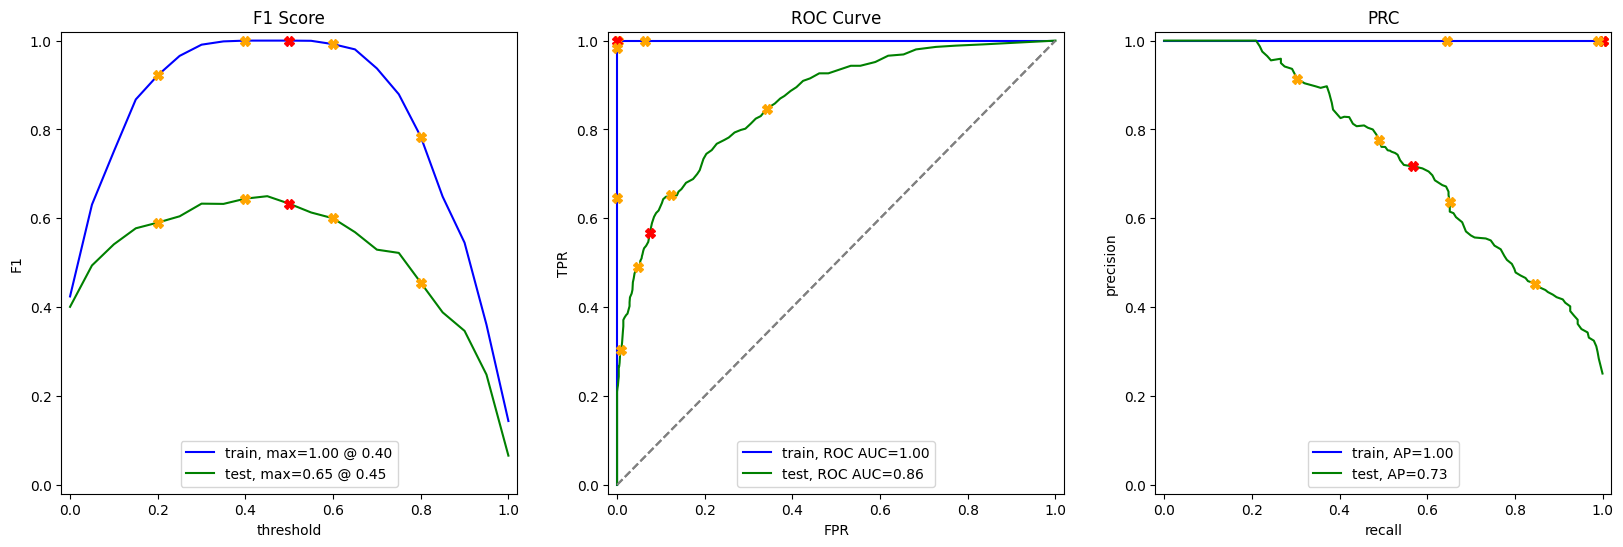

In [66]:
evaluate_model(rf, features_train, target_train, features_valid, target_valid)

In [67]:
%time

# catboost

cb = CatBoostClassifier()
cb.fit(features_train, target_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Learning rate set to 0.019062
0:	learn: 0.6782802	total: 48.2ms	remaining: 48.1s
1:	learn: 0.6631803	total: 49.7ms	remaining: 24.8s
2:	learn: 0.6487739	total: 51.2ms	remaining: 17s
3:	learn: 0.6341305	total: 52.6ms	remaining: 13.1s
4:	learn: 0.6207833	total: 54.1ms	remaining: 10.8s
5:	learn: 0.6101496	total: 55.5ms	remaining: 9.2s
6:	learn: 0.5982881	total: 57ms	remaining: 8.09s
7:	learn: 0.5893430	total: 58.5ms	remaining: 7.25s
8:	learn: 0.5801134	total: 60ms	remaining: 6.6s
9:	learn: 0.5699825	total: 61.4ms	remaining: 6.08s
10:	learn: 0.5600663	total: 62.9ms	remaining: 5.65s
11:	learn: 0.5511663	total: 64.3ms	remaining: 5.3s
12:	learn: 0.5437119	total: 65.9ms	remaining: 5s
13:	learn: 0.5359809	total: 67.3ms	remaining: 4.74s
14:	learn: 0.5282790	total: 68.8ms	remaining: 4.52s
15:	learn: 0.5219896	total: 70.3ms	remaining: 4.32s
16:	learn: 0.5160072	total: 71.8ms	remaining: 4.15s
17:	learn: 0.5099147	total: 73.2ms	remaining:

165:	learn: 0.3320479	total: 303ms	remaining: 1.52s
166:	learn: 0.3318081	total: 305ms	remaining: 1.52s
167:	learn: 0.3316264	total: 307ms	remaining: 1.52s
168:	learn: 0.3313599	total: 309ms	remaining: 1.52s
169:	learn: 0.3311009	total: 311ms	remaining: 1.52s
170:	learn: 0.3307354	total: 313ms	remaining: 1.51s
171:	learn: 0.3305244	total: 315ms	remaining: 1.51s
172:	learn: 0.3302188	total: 316ms	remaining: 1.51s
173:	learn: 0.3296448	total: 318ms	remaining: 1.51s
174:	learn: 0.3293972	total: 319ms	remaining: 1.5s
175:	learn: 0.3290596	total: 321ms	remaining: 1.5s
176:	learn: 0.3287135	total: 322ms	remaining: 1.5s
177:	learn: 0.3284969	total: 323ms	remaining: 1.49s
178:	learn: 0.3280900	total: 325ms	remaining: 1.49s
179:	learn: 0.3279222	total: 326ms	remaining: 1.49s
180:	learn: 0.3277139	total: 328ms	remaining: 1.48s
181:	learn: 0.3275704	total: 329ms	remaining: 1.48s
182:	learn: 0.3273196	total: 331ms	remaining: 1.48s
183:	learn: 0.3270945	total: 332ms	remaining: 1.47s
184:	learn: 0.3

423:	learn: 0.2703044	total: 699ms	remaining: 949ms
424:	learn: 0.2701540	total: 700ms	remaining: 948ms
425:	learn: 0.2696295	total: 702ms	remaining: 946ms
426:	learn: 0.2695336	total: 703ms	remaining: 944ms
427:	learn: 0.2692827	total: 705ms	remaining: 942ms
428:	learn: 0.2690388	total: 706ms	remaining: 940ms
429:	learn: 0.2686524	total: 708ms	remaining: 938ms
430:	learn: 0.2685056	total: 709ms	remaining: 937ms
431:	learn: 0.2682651	total: 711ms	remaining: 935ms
432:	learn: 0.2681285	total: 712ms	remaining: 933ms
433:	learn: 0.2679866	total: 714ms	remaining: 931ms
434:	learn: 0.2674908	total: 715ms	remaining: 929ms
435:	learn: 0.2671878	total: 717ms	remaining: 927ms
436:	learn: 0.2669941	total: 718ms	remaining: 925ms
437:	learn: 0.2668774	total: 720ms	remaining: 923ms
438:	learn: 0.2667096	total: 721ms	remaining: 922ms
439:	learn: 0.2665234	total: 723ms	remaining: 920ms
440:	learn: 0.2664497	total: 724ms	remaining: 918ms
441:	learn: 0.2663544	total: 726ms	remaining: 916ms
442:	learn: 

677:	learn: 0.2092524	total: 1.09s	remaining: 519ms
678:	learn: 0.2090794	total: 1.09s	remaining: 517ms
679:	learn: 0.2089341	total: 1.1s	remaining: 516ms
680:	learn: 0.2087768	total: 1.1s	remaining: 514ms
681:	learn: 0.2085997	total: 1.1s	remaining: 513ms
682:	learn: 0.2084319	total: 1.1s	remaining: 511ms
683:	learn: 0.2083571	total: 1.1s	remaining: 509ms
684:	learn: 0.2079526	total: 1.1s	remaining: 508ms
685:	learn: 0.2078502	total: 1.1s	remaining: 506ms
686:	learn: 0.2076829	total: 1.11s	remaining: 504ms
687:	learn: 0.2076229	total: 1.11s	remaining: 503ms
688:	learn: 0.2072849	total: 1.11s	remaining: 501ms
689:	learn: 0.2071459	total: 1.11s	remaining: 499ms
690:	learn: 0.2070191	total: 1.11s	remaining: 498ms
691:	learn: 0.2069652	total: 1.11s	remaining: 496ms
692:	learn: 0.2068282	total: 1.11s	remaining: 494ms
693:	learn: 0.2066962	total: 1.12s	remaining: 493ms
694:	learn: 0.2064822	total: 1.12s	remaining: 491ms
695:	learn: 0.2063209	total: 1.12s	remaining: 489ms
696:	learn: 0.20605

931:	learn: 0.1734418	total: 1.49s	remaining: 108ms
932:	learn: 0.1733280	total: 1.49s	remaining: 107ms
933:	learn: 0.1731585	total: 1.49s	remaining: 105ms
934:	learn: 0.1730998	total: 1.49s	remaining: 104ms
935:	learn: 0.1729405	total: 1.49s	remaining: 102ms
936:	learn: 0.1727821	total: 1.49s	remaining: 101ms
937:	learn: 0.1726142	total: 1.5s	remaining: 98.9ms
938:	learn: 0.1724683	total: 1.5s	remaining: 97.3ms
939:	learn: 0.1724104	total: 1.5s	remaining: 95.8ms
940:	learn: 0.1722546	total: 1.5s	remaining: 94.2ms
941:	learn: 0.1720695	total: 1.5s	remaining: 92.6ms
942:	learn: 0.1718714	total: 1.51s	remaining: 91ms
943:	learn: 0.1715602	total: 1.51s	remaining: 89.5ms
944:	learn: 0.1715165	total: 1.51s	remaining: 87.9ms
945:	learn: 0.1713992	total: 1.51s	remaining: 86.3ms
946:	learn: 0.1712929	total: 1.51s	remaining: 84.7ms
947:	learn: 0.1712568	total: 1.51s	remaining: 83.2ms
948:	learn: 0.1711613	total: 1.52s	remaining: 81.6ms
949:	learn: 0.1709553	total: 1.52s	remaining: 80ms
950:	lea

          train  test
Accuracy   0.95  0.91
F1         0.90  0.79
APS        0.98  0.89
ROC AUC    0.99  0.94

Confusion Matrix
[[1028   28]
 [ 104  249]]



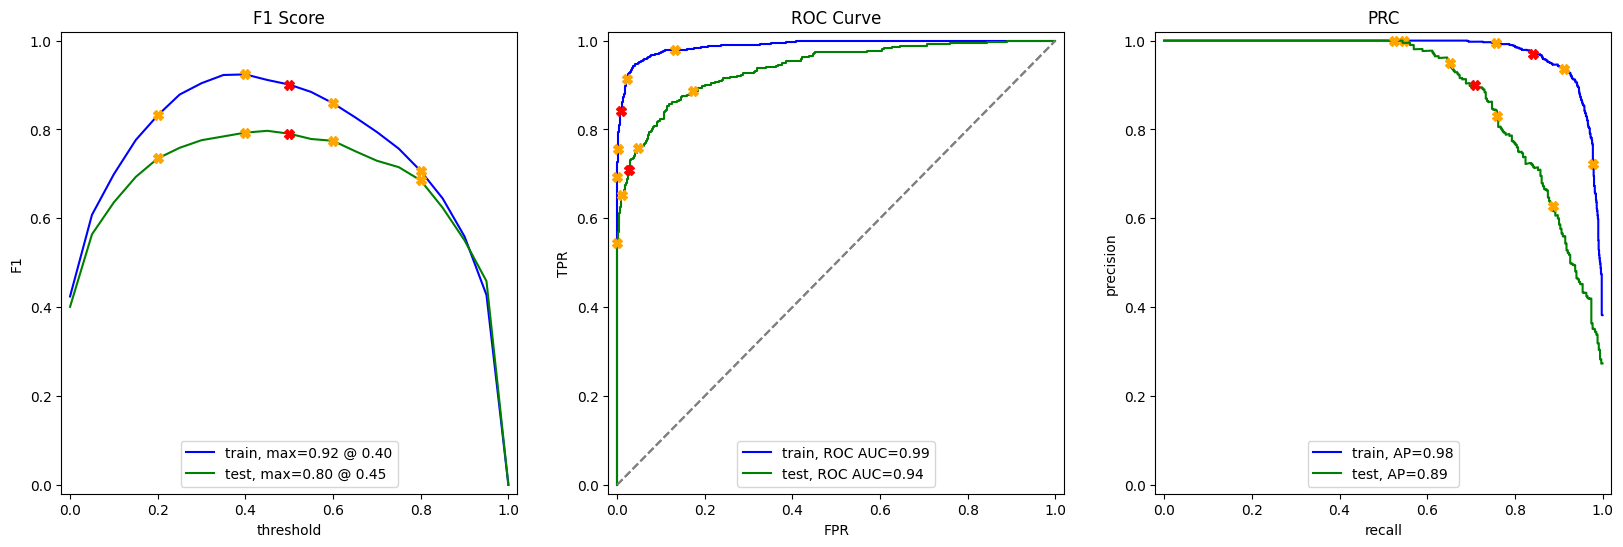

In [68]:
evaluate_model(cb, features_train, target_train, features_valid, target_valid)


In [69]:
#Try upsample method

%time

# decision tree

dt2 = DecisionTreeClassifier(random_state = 12345)
dt2.fit(features_upsampled, target_upsampled)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


DecisionTreeClassifier(random_state=12345)

          train  test
Accuracy    1.0  0.80
F1          1.0  0.63
APS         1.0  0.48
ROC AUC     1.0  0.76

Confusion Matrix
[[891 165]
 [114 239]]



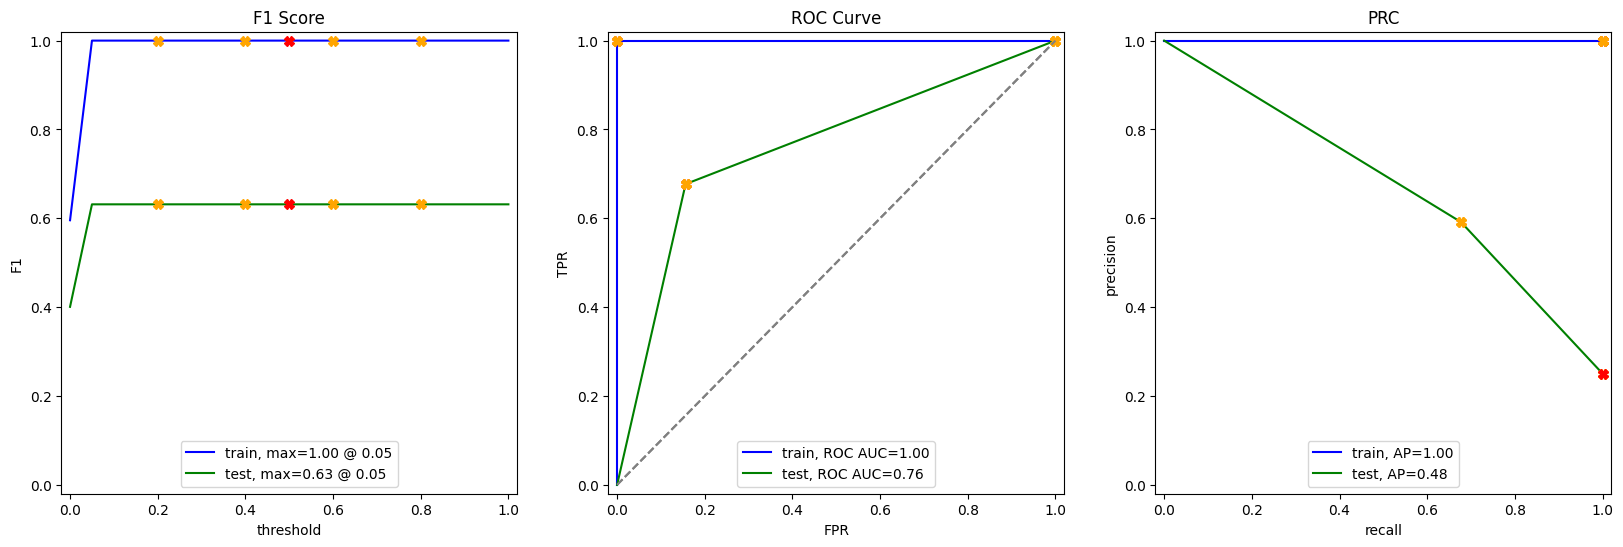

In [70]:
evaluate_model(dt2, features_upsampled, target_upsampled, features_valid, target_valid)

In [71]:
%time
# logistic regression

lr2 = LogisticRegression(random_state = 12345, solver = 'liblinear')
lr2.fit(features_upsampled, target_upsampled)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.77  0.75
F1         0.74  0.60
APS        0.81  0.64
ROC AUC    0.86  0.83

Confusion Matrix
[[803 253]
 [ 95 258]]



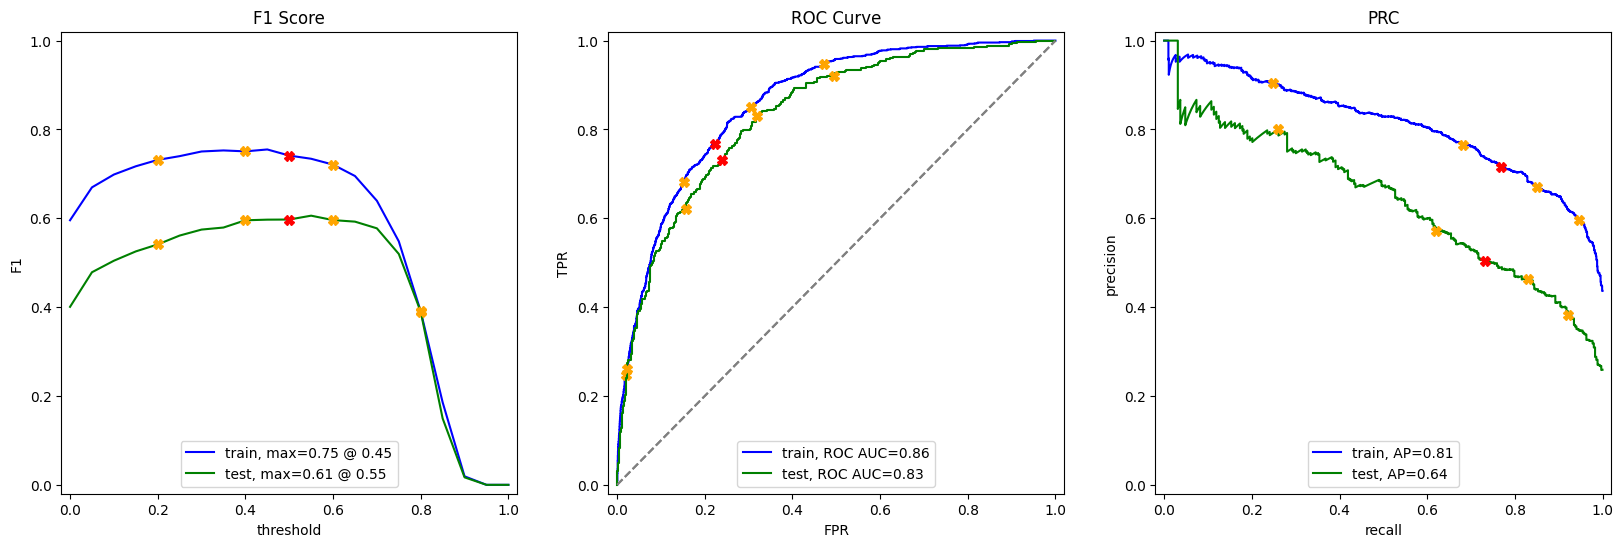

In [72]:
evaluate_model(lr2, features_upsampled, target_upsampled, features_valid, target_valid)

In [73]:
%time

# random forest

rf2 = RandomForestClassifier(random_state = 12345)
rf2.fit(features_upsampled, target_upsampled)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


RandomForestClassifier(random_state=12345)

          train  test
Accuracy    1.0  0.83
F1          1.0  0.65
APS         1.0  0.73
ROC AUC     1.0  0.86

Confusion Matrix
[[947 109]
 [131 222]]



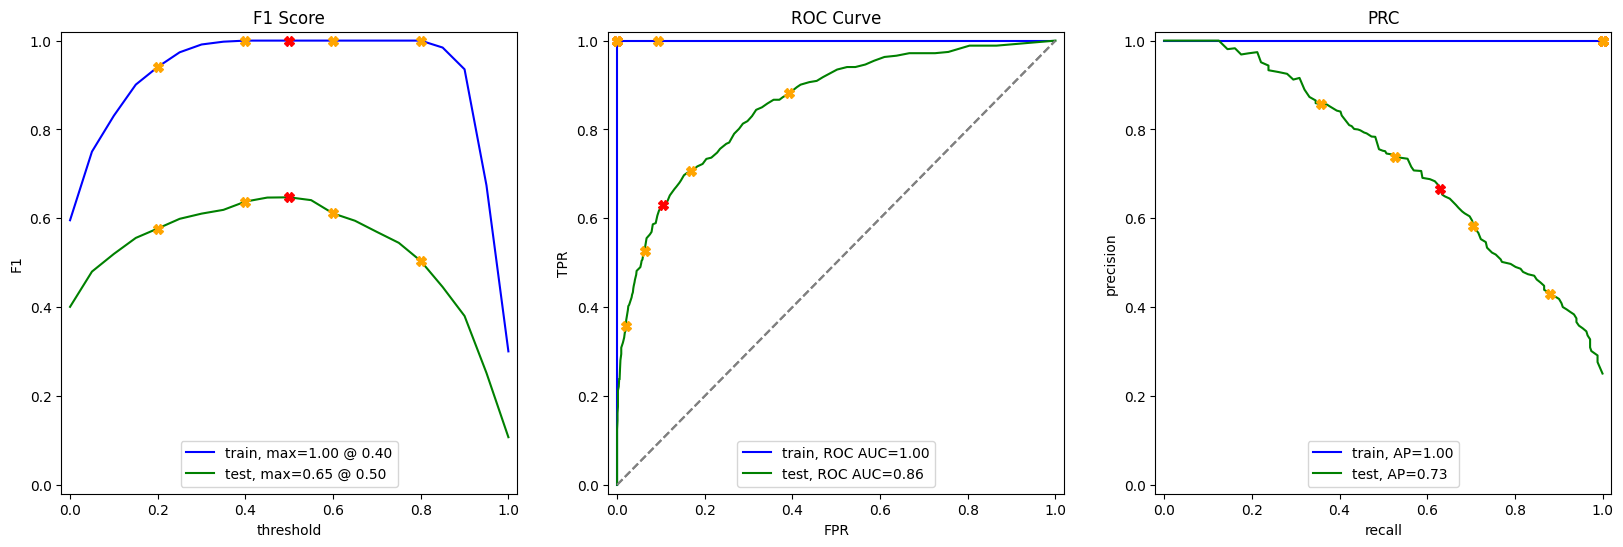

In [74]:
evaluate_model(rf2, features_upsampled, target_upsampled, features_valid, target_valid)

In [75]:
%time

# catboost

cb2 = CatBoostClassifier()
cb2.fit(features_upsampled, target_upsampled)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Learning rate set to 0.021104
0:	learn: 0.6789944	total: 1.67ms	remaining: 1.67s
1:	learn: 0.6656200	total: 3.53ms	remaining: 1.76s
2:	learn: 0.6524330	total: 5.1ms	remaining: 1.69s
3:	learn: 0.6433687	total: 6.31ms	remaining: 1.57s
4:	learn: 0.6332287	total: 7.97ms	remaining: 1.58s
5:	learn: 0.6239479	total: 9.6ms	remaining: 1.59s
6:	learn: 0.6131322	total: 11.2ms	remaining: 1.59s
7:	learn: 0.6039181	total: 12.9ms	remaining: 1.6s
8:	learn: 0.5952087	total: 14.5ms	remaining: 1.6s
9:	learn: 0.5883302	total: 16.1ms	remaining: 1.6s
10:	learn: 0.5817280	total: 17.8ms	remaining: 1.6s
11:	learn: 0.5761689	total: 19.5ms	remaining: 1.6s
12:	learn: 0.5683449	total: 21.1ms	remaining: 1.6s
13:	learn: 0.5629474	total: 22.8ms	remaining: 1.61s
14:	learn: 0.5557667	total: 24.4ms	remaining: 1.6s
15:	learn: 0.5508668	total: 26ms	remaining: 1.6s
16:	learn: 0.5444035	total: 27.7ms	remaining: 1.6s
17:	learn: 0.5388601	total: 29.4ms	remaining:

186:	learn: 0.3591989	total: 327ms	remaining: 1.42s
187:	learn: 0.3588572	total: 330ms	remaining: 1.42s
188:	learn: 0.3585323	total: 331ms	remaining: 1.42s
189:	learn: 0.3582726	total: 333ms	remaining: 1.42s
190:	learn: 0.3579366	total: 334ms	remaining: 1.42s
191:	learn: 0.3576445	total: 336ms	remaining: 1.41s
192:	learn: 0.3573303	total: 338ms	remaining: 1.41s
193:	learn: 0.3568217	total: 339ms	remaining: 1.41s
194:	learn: 0.3564719	total: 341ms	remaining: 1.41s
195:	learn: 0.3560036	total: 343ms	remaining: 1.41s
196:	learn: 0.3554845	total: 344ms	remaining: 1.4s
197:	learn: 0.3553619	total: 346ms	remaining: 1.4s
198:	learn: 0.3551255	total: 348ms	remaining: 1.4s
199:	learn: 0.3548603	total: 350ms	remaining: 1.4s
200:	learn: 0.3545936	total: 352ms	remaining: 1.4s
201:	learn: 0.3541843	total: 353ms	remaining: 1.4s
202:	learn: 0.3540051	total: 355ms	remaining: 1.39s
203:	learn: 0.3537740	total: 361ms	remaining: 1.41s
204:	learn: 0.3534960	total: 362ms	remaining: 1.41s
205:	learn: 0.3527

408:	learn: 0.2859269	total: 723ms	remaining: 1.04s
409:	learn: 0.2857906	total: 725ms	remaining: 1.04s
410:	learn: 0.2856127	total: 727ms	remaining: 1.04s
411:	learn: 0.2851579	total: 729ms	remaining: 1.04s
412:	learn: 0.2849739	total: 730ms	remaining: 1.04s
413:	learn: 0.2848196	total: 732ms	remaining: 1.04s
414:	learn: 0.2844645	total: 734ms	remaining: 1.03s
415:	learn: 0.2842800	total: 735ms	remaining: 1.03s
416:	learn: 0.2835163	total: 737ms	remaining: 1.03s
417:	learn: 0.2828911	total: 739ms	remaining: 1.03s
418:	learn: 0.2826402	total: 740ms	remaining: 1.03s
419:	learn: 0.2824490	total: 742ms	remaining: 1.02s
420:	learn: 0.2822338	total: 744ms	remaining: 1.02s
421:	learn: 0.2812756	total: 746ms	remaining: 1.02s
422:	learn: 0.2808660	total: 752ms	remaining: 1.02s
423:	learn: 0.2802404	total: 754ms	remaining: 1.02s
424:	learn: 0.2799220	total: 755ms	remaining: 1.02s
425:	learn: 0.2797994	total: 757ms	remaining: 1.02s
426:	learn: 0.2797035	total: 758ms	remaining: 1.02s
427:	learn: 

632:	learn: 0.2183337	total: 1.12s	remaining: 649ms
633:	learn: 0.2181507	total: 1.12s	remaining: 648ms
634:	learn: 0.2177507	total: 1.12s	remaining: 646ms
635:	learn: 0.2175444	total: 1.13s	remaining: 645ms
636:	learn: 0.2172952	total: 1.13s	remaining: 643ms
637:	learn: 0.2171812	total: 1.13s	remaining: 642ms
638:	learn: 0.2170112	total: 1.13s	remaining: 640ms
639:	learn: 0.2169116	total: 1.14s	remaining: 639ms
640:	learn: 0.2167165	total: 1.14s	remaining: 638ms
641:	learn: 0.2164722	total: 1.15s	remaining: 639ms
642:	learn: 0.2163327	total: 1.15s	remaining: 637ms
643:	learn: 0.2162295	total: 1.15s	remaining: 636ms
644:	learn: 0.2160557	total: 1.15s	remaining: 634ms
645:	learn: 0.2158930	total: 1.15s	remaining: 633ms
646:	learn: 0.2157610	total: 1.16s	remaining: 631ms
647:	learn: 0.2155391	total: 1.16s	remaining: 630ms
648:	learn: 0.2153019	total: 1.16s	remaining: 628ms
649:	learn: 0.2151831	total: 1.16s	remaining: 627ms
650:	learn: 0.2149752	total: 1.17s	remaining: 625ms
651:	learn: 

841:	learn: 0.1791469	total: 1.51s	remaining: 284ms
842:	learn: 0.1790260	total: 1.51s	remaining: 282ms
843:	learn: 0.1788532	total: 1.52s	remaining: 281ms
844:	learn: 0.1787687	total: 1.52s	remaining: 279ms
845:	learn: 0.1786361	total: 1.52s	remaining: 277ms
846:	learn: 0.1785083	total: 1.52s	remaining: 276ms
847:	learn: 0.1783676	total: 1.53s	remaining: 274ms
848:	learn: 0.1780087	total: 1.53s	remaining: 272ms
849:	learn: 0.1777115	total: 1.53s	remaining: 270ms
850:	learn: 0.1776152	total: 1.54s	remaining: 269ms
851:	learn: 0.1774420	total: 1.54s	remaining: 267ms
852:	learn: 0.1773373	total: 1.54s	remaining: 266ms
853:	learn: 0.1771295	total: 1.54s	remaining: 264ms
854:	learn: 0.1768721	total: 1.54s	remaining: 262ms
855:	learn: 0.1767792	total: 1.55s	remaining: 260ms
856:	learn: 0.1766787	total: 1.55s	remaining: 259ms
857:	learn: 0.1766056	total: 1.55s	remaining: 257ms
858:	learn: 0.1764782	total: 1.55s	remaining: 255ms
859:	learn: 0.1760857	total: 1.56s	remaining: 254ms
860:	learn: 

          train  test
Accuracy   0.97  0.91
F1         0.96  0.81
APS        1.00  0.90
ROC AUC    1.00  0.94

Confusion Matrix
[[997  59]
 [ 71 282]]



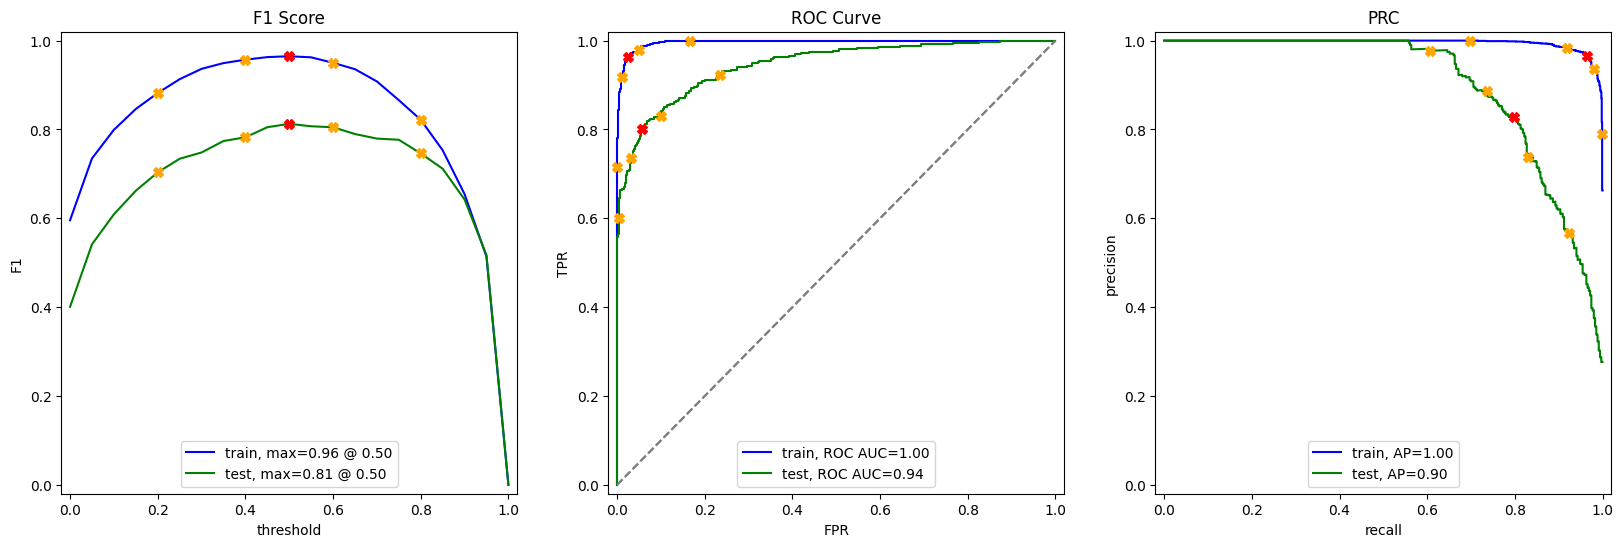

In [76]:
evaluate_model(cb2, features_upsampled, target_upsampled, features_valid, target_valid)

The upsampling did not greatly impact any of our models but overall it resulted in higher accuracy. However, it could be argued that this higher accuracy may be an undesirable result specifically because it balances the false positives and false negatives which results in our Catboost model seeing more false negatives. We have already positioned that false positives are preferable to false negatives for our goals of increasing customer retention.

Ultimately, a gridsearch does not appear to be necessary. It tends to be a lengthy process and our CatBoost model appears to be performing close to maximum accuracy. Thus, we will use CatBoost as our model of choice and proceed to check it against our test set.


# Test the Model

          train  test
Accuracy   0.95  0.91
F1         0.90  0.82
APS        0.98  0.91
ROC AUC    0.99  0.95

Confusion Matrix
[[1009   21]
 [ 103  276]]



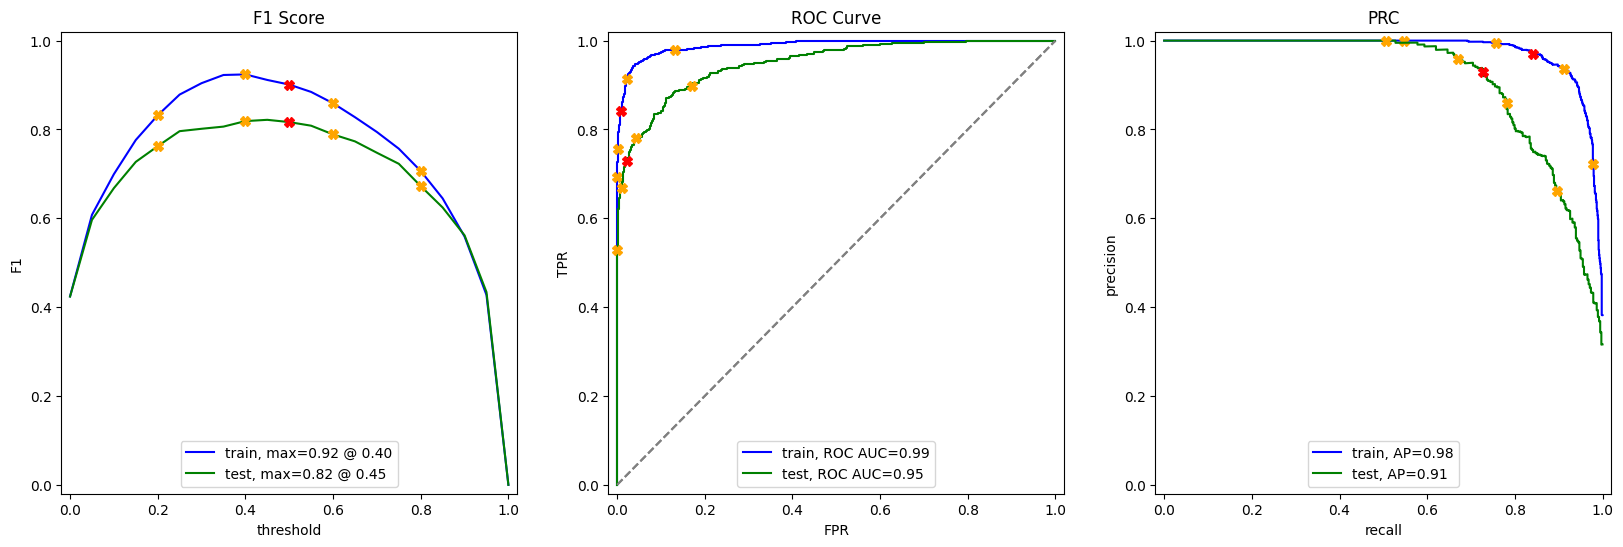

In [77]:
evaluate_model(cb, features_train, target_train, features_test, target_test)